In [3]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
# !git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 12644, done.
remote: Total 12644 (delta 0), reused 0 (delta 0), pack-reused 12644
Receiving objects: 100% (12644/12644), 11.66 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (8811/8811), done.


In [4]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies
%cd yolov5
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
# from utils.google_utils import gdrive_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/home/koen/study/s4/gp/code/yolov5
Setup complete. Using torch 1.11.0+cu102 _CudaDeviceProperties(name='NVIDIA GeForce GTX 1660 Ti', major=7, minor=5, total_memory=5944MB, multi_processor_count=24)


In [1]:
#follow the link below to get your download code from from Roboflow
!pip install -q roboflow
from roboflow import Roboflow
rf = Roboflow(model_format="yolov5", notebook="roboflow-yolov5")

In [3]:
import os
from dotenv import load_dotenv

load_dotenv('.env') # DO NOT PRINT OUT THE ENVIRONMENT VARIABLES since the output may be saved, because of Jupyter notebook and then may be pushed to github excedentally

API_KEY = os.getenv('API_KEY')
WORKSPACE = os.getenv('WORKSPACE')
PROJECT = os.getenv('PROJECT')

%cd yolov5
#after following the link above, recieve python code with these fields filled in
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY) #if you want to change you API_KEY/WORKSPACE/PROJECT you may need to reopen the jupyter file in your editor or restart your editor
project = rf.workspace(WORKSPACE).project(PROJECT)
dataset = project.version(2).download("yolov5")

/home/koen/study/s4/gp/code/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to LITR-2 in yolov5pytorch:: 100%|██████████| 2852/2852 [00:00<00:00, 8962.32it/s]


In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat {dataset.location}/data.yaml

In [2]:
# naming scheme
# model_dataset_epoch_weights
%time
!python3 ./yolov5/train.py --img 416 --batch 16 --epochs 300 --data ./LITR-2/data.yaml --cfg ./yolov5/models/yolov5s.yaml --weights ./yolov5/runs/train/yolov5s_taco_v2_baseconf_300e_latest_results/weights/best.pt --name yolov5s_taco_v2_baseconf_300e_latest_results_continued_v2_test --cache

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.34 µs
train: weights=./yolov5/runs/train/yolov5s_taco_v2_baseconf_300e_latest_results/weights/best.pt, cfg=./yolov5/models/yolov5s.yaml, data=./LITR-2/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=yolov5s_taco_v2_baseconf_300e_latest_results_continued_v2_test, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-110-g0ca85ed torch 1.11.0+cu102 CUDA:0 (NVIDIA GeForce GTX 1660 Ti, 5945MiB)

hyperparameters: lr0=0.01, lrf=0.01, m

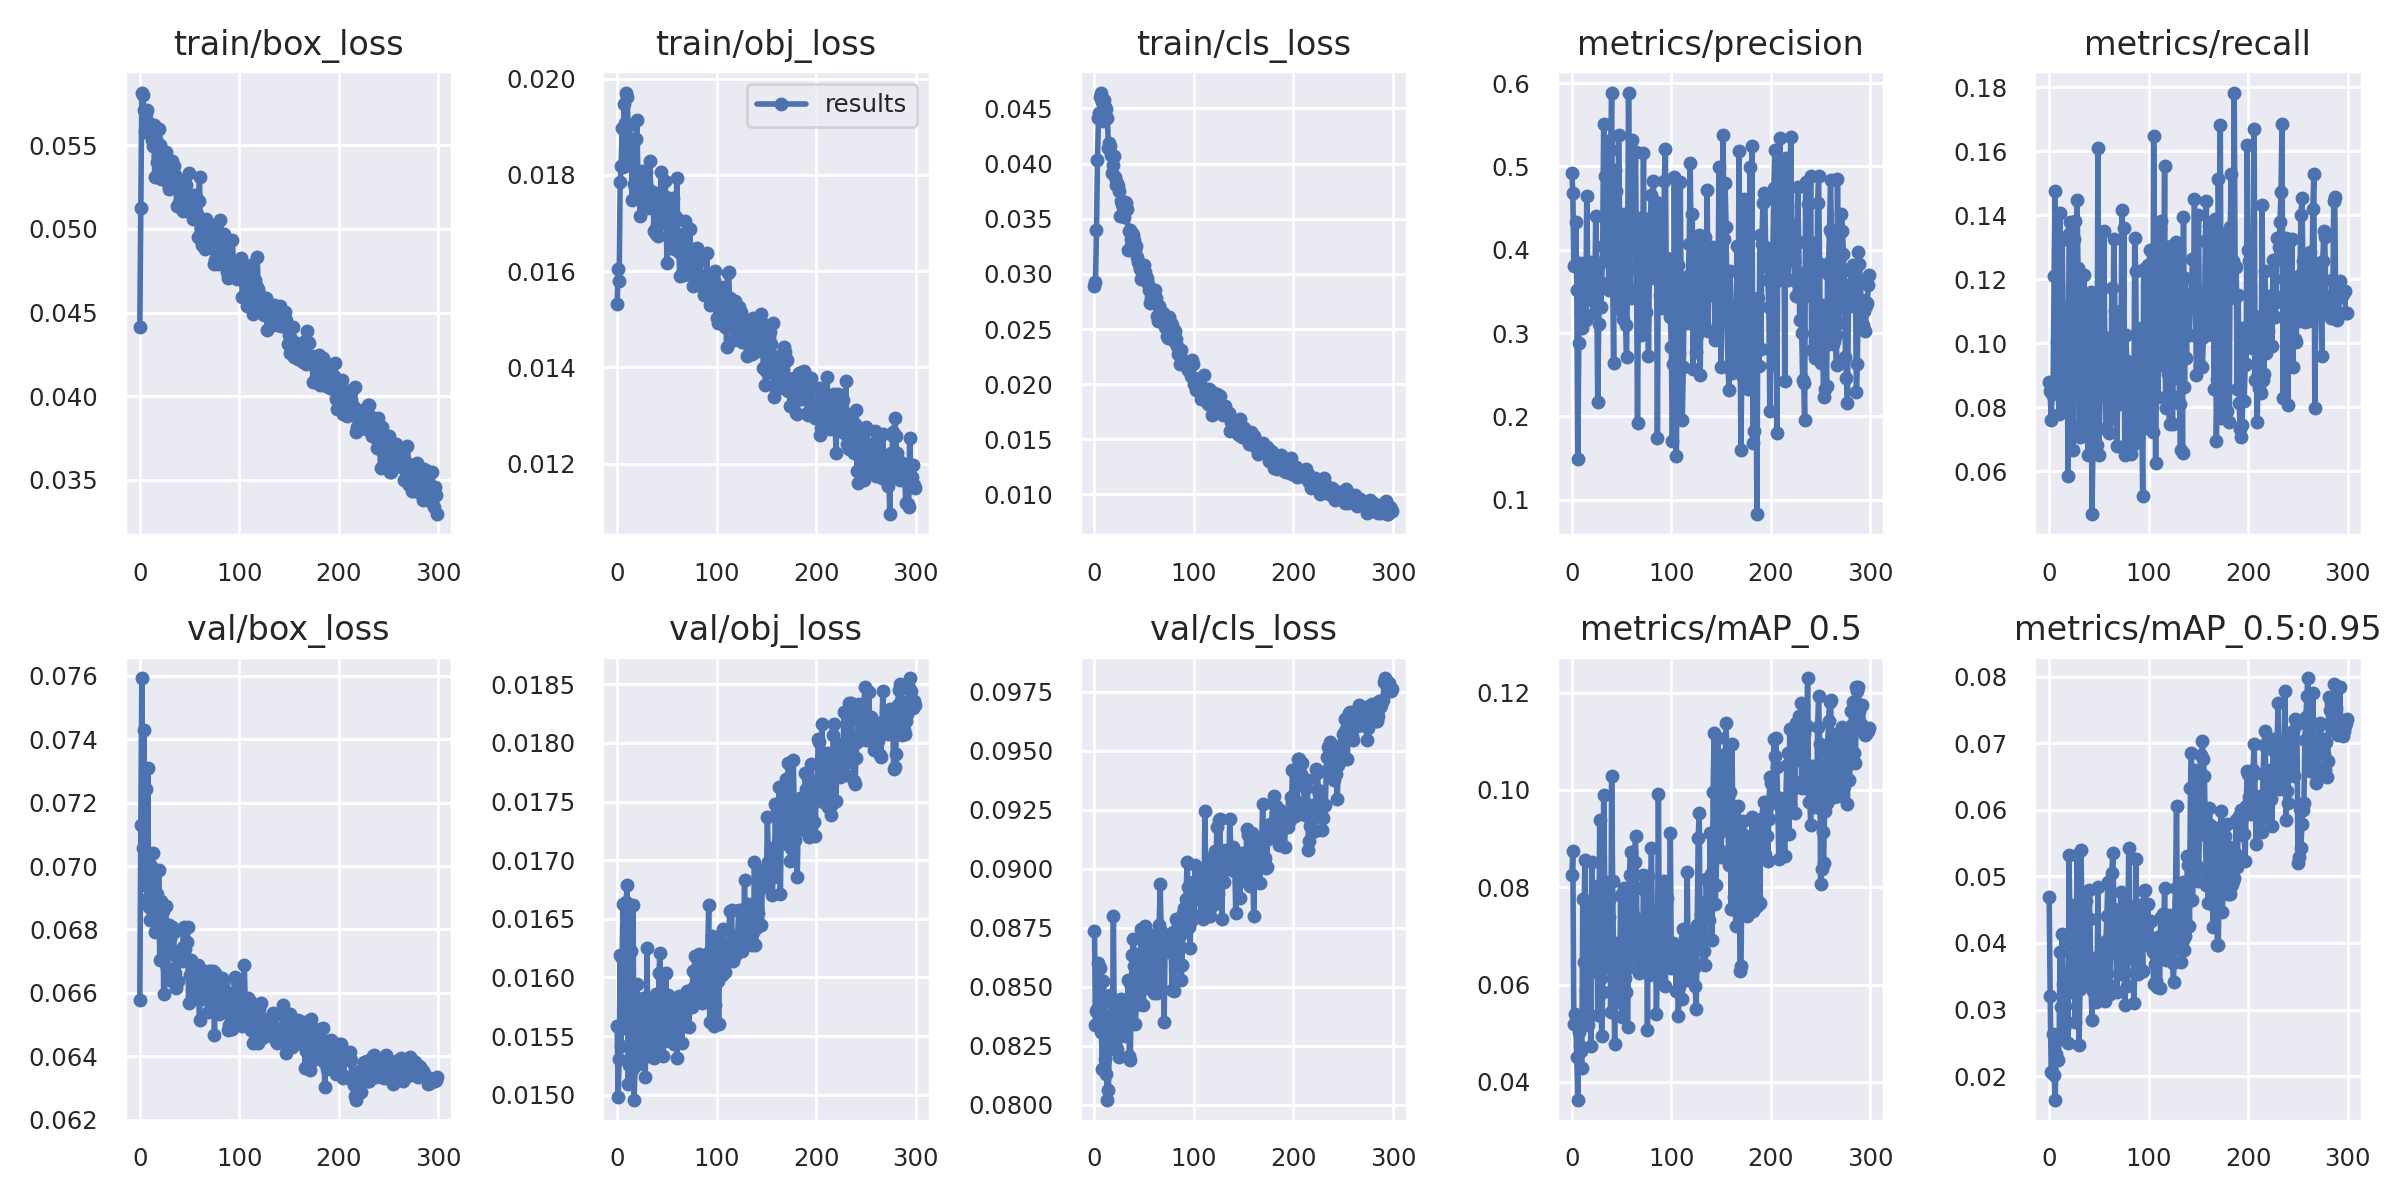

In [13]:
# we can also output some older school graphs if the tensor board isn't working for whatever reason... 
# from utils.plots import plot_results  # plot results.txt as results.png
from IPython.display import Image
Image(filename='yolov5/runs/train/yolov5s_taco_v2_baseconf_300e_latest_results_continued_v1/results.png', width=1000)  # view results.png

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
!python3 detect.py --weights yolov5/runs/train/yolov5s_taco_v2_baseconf_300e_latest_results_continued_v1/weights/best.pt --img 416 --conf 0.4 --source LITR-1/test/images/